In [69]:
from os.path import dirname, join as pjoin
import scipy as sp
import numpy as np
import scipy.io as sio

from scipy.fft import fft, ifft, fftfreq, fftshift

In [4]:
mat_file = sio.loadmat('../data/test_mat/DualHermiteDL_test.mat')

In [5]:
sorted(mat_file.keys())
# print(mat_file)
# print(mat_file.dtype)

['K',
 'L',
 'M',
 'MODULATION',
 'Nruns',
 'Nsc',
 'Pdbm',
 'S',
 'Tn',
 'Ts',
 'Wref',
 '__globals__',
 '__header__',
 '__version__',
 'bin2_pooled',
 'bin_pooled',
 'bout2_pooled',
 'bout_pooled',
 'data_in',
 'data_in2',
 'data_out',
 'data_out2',
 'eta',
 'nase',
 'positions',
 'positions2',
 'qout1_pooled',
 'qout2_pooled',
 'qz1_pooled',
 'qz2_pooled',
 'symbols_in',
 'symbols_in2',
 'symbols_out',
 'symbols_out2',
 't0',
 'uin2_pooled',
 'uin_pooled',
 'uout2_pooled',
 'uout_pooled']

In [6]:
np.shape(mat_file['bin_pooled'])
mat_file['bin_pooled'][0][0]


array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00-0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
       -0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
       -0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
       -0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
       -0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
       -0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
       -0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
       -0.00000000e+00+0.00000000e+00j,  0.00000000e+00-0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00-0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j, -0.00000000e+00+0.00000000e+00j,
        0.00000000e+00-0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
       -0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000

In [36]:
power_ind = 19
b_in_first_p0 = mat_file['bin_pooled'][power_ind]
b_out_first_p0 = mat_file['bout_pooled'][power_ind]
b_in_second_p0 = mat_file['bin2_pooled'][power_ind]
b_out_second_p0 = mat_file['bout2_pooled'][power_ind]
print(np.shape(b_in_first_p0))

q_first_p0 = mat_file['qout1_pooled'][power_ind]
q_second_p0 = mat_file['qout2_pooled'][power_ind]

q_z_first_p0 = mat_file['qz1_pooled'][power_ind]
q_z_second_p0 = mat_file['qz2_pooled'][power_ind]


(50, 128)


In [64]:
print(np.shape(q_z_first_p0))
test_stack = np.stack((np.real(q_z_first_p0), np.imag(q_z_first_p0), np.real(q_z_second_p0), np.imag(q_z_second_p0)), axis=2)
print(np.shape(test_stack))
a_re = np.array([k[0] for k in test_stack[0]])
a_im = np.array([k[1] for k in test_stack[0]])
print(np.shape(a_re))
# test_reshape = np.reshape(test_stack, (50, 128, 4))
# print(np.shape(test_reshape))
#
# bbb = np.array([k[0] for k in test_reshape[0]])
# print(np.shape(bbb))
# test_stack2 = np.array([np.transpose(i) for i in test_stack])
# print(np.shape(test_stack2[0][:]))

# print(np.absolute(aaa - bbb))

# print(a_im)

(50, 128)
(50, 128, 4)
(128,)


In [51]:
ta = np.array([[[1, 2, 3], [4, 5, 6]], [[11, 12, 13], [14, 15, 16]]])
print(np.shape(ta))

(2, 2, 3)


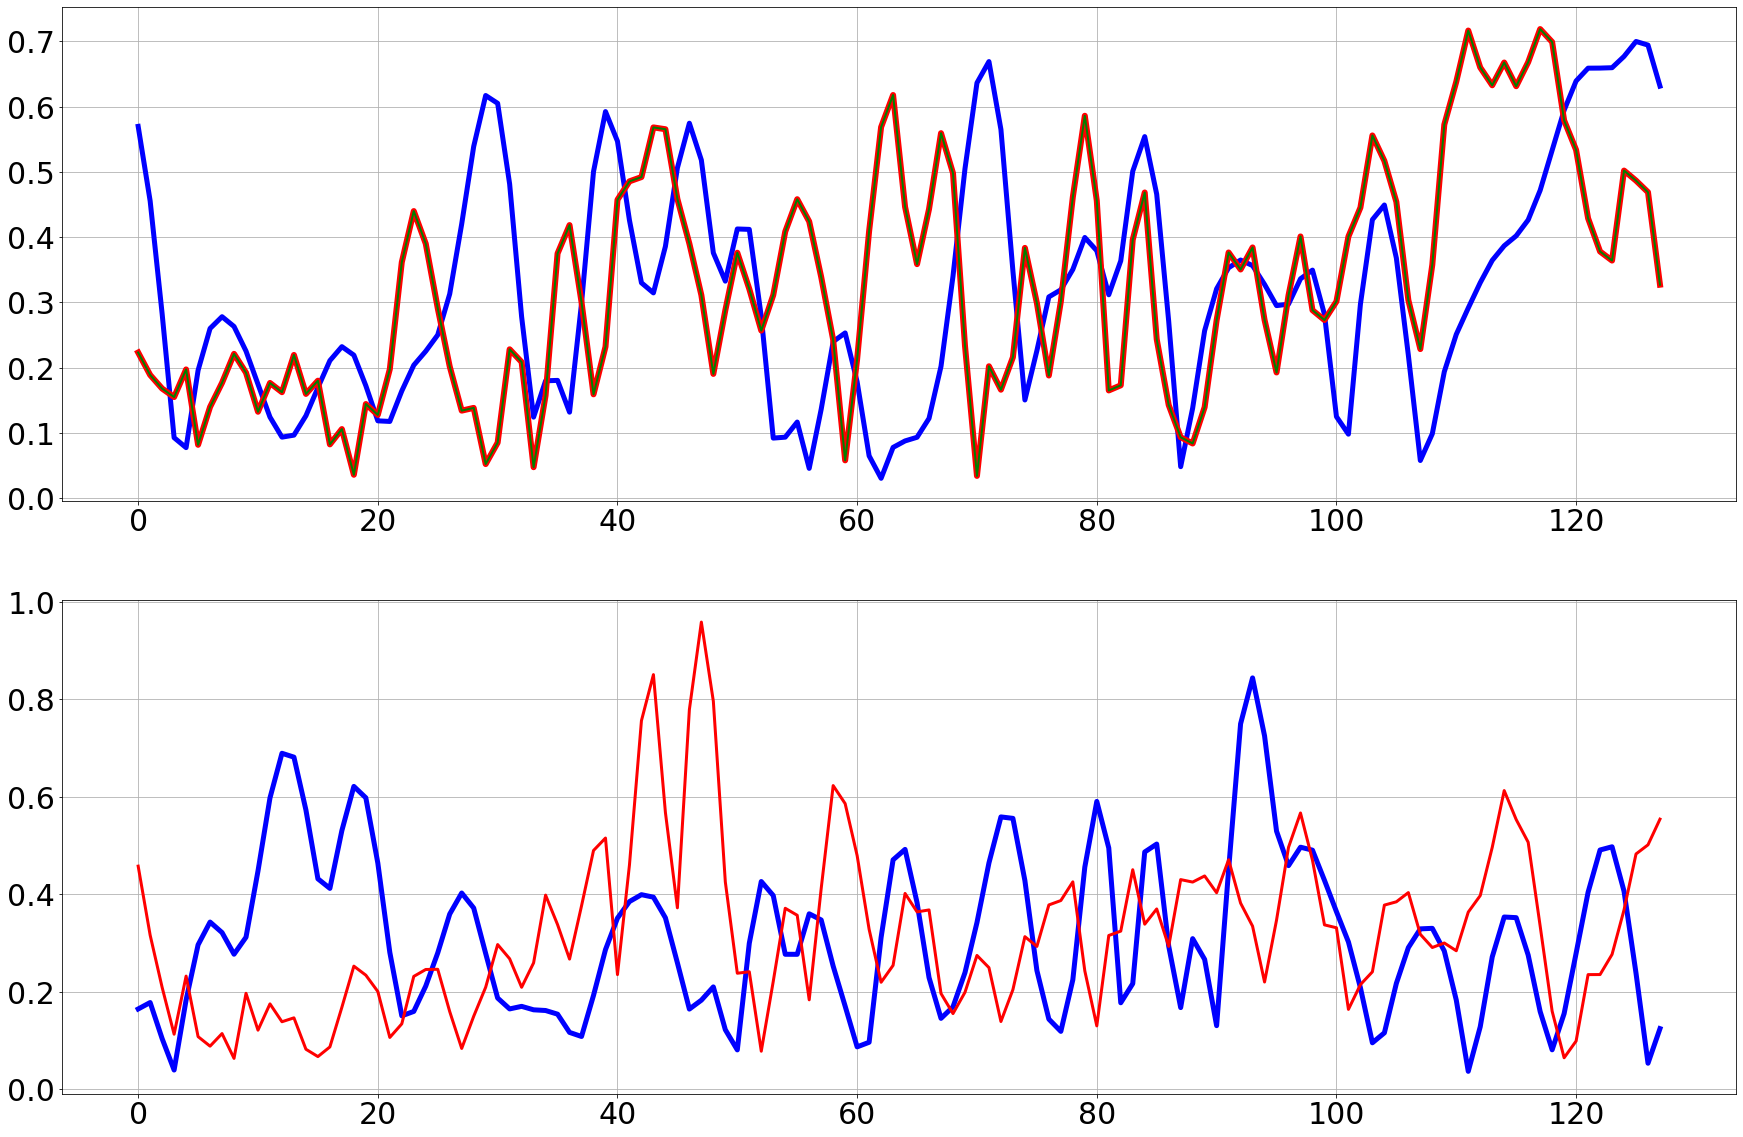

In [66]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 30})

fig, axs = plt.subplots(2, 1, figsize=(30, 20))
# axs[0].plot(np.absolute(b_in_first_p0[0]), color='blue', linewidth=5.0)
# axs[0].plot(np.absolute(b_out_first_p0[0]), color='red', linewidth=3.0)
axs[0].plot(np.absolute(q_first_p0[0]), color='blue', linewidth=5.0)
axs[0].plot(np.absolute(q_z_first_p0[0]), color='red', linewidth=6.0)
axs[0].plot(np.absolute(a_re + 1j * a_im), color='green', linewidth=2.0)
# axs[0].set_xlim(0, 1)
# axs[0].set_xlabel('')
# axs[0].set_ylabel('')
axs[0].grid(True)

# axs[1].plot(np.absolute(b_in_second_p0[0]), color='blue', linewidth=5.0)
# axs[1].plot(np.absolute(b_out_second_p0[0]), color='red', linewidth=3.0)
axs[1].plot(np.absolute(q_second_p0[0]), color='blue', linewidth=5.0)
axs[1].plot(np.absolute(q_z_second_p0[0]), color='red', linewidth=3.0)
# axs[1].set_xlim(0, 1)
# axs[1].set_xlabel('')
# axs[1].set_ylabel('')
axs[1].grid(True)

# fig.show()

42.19409282700422


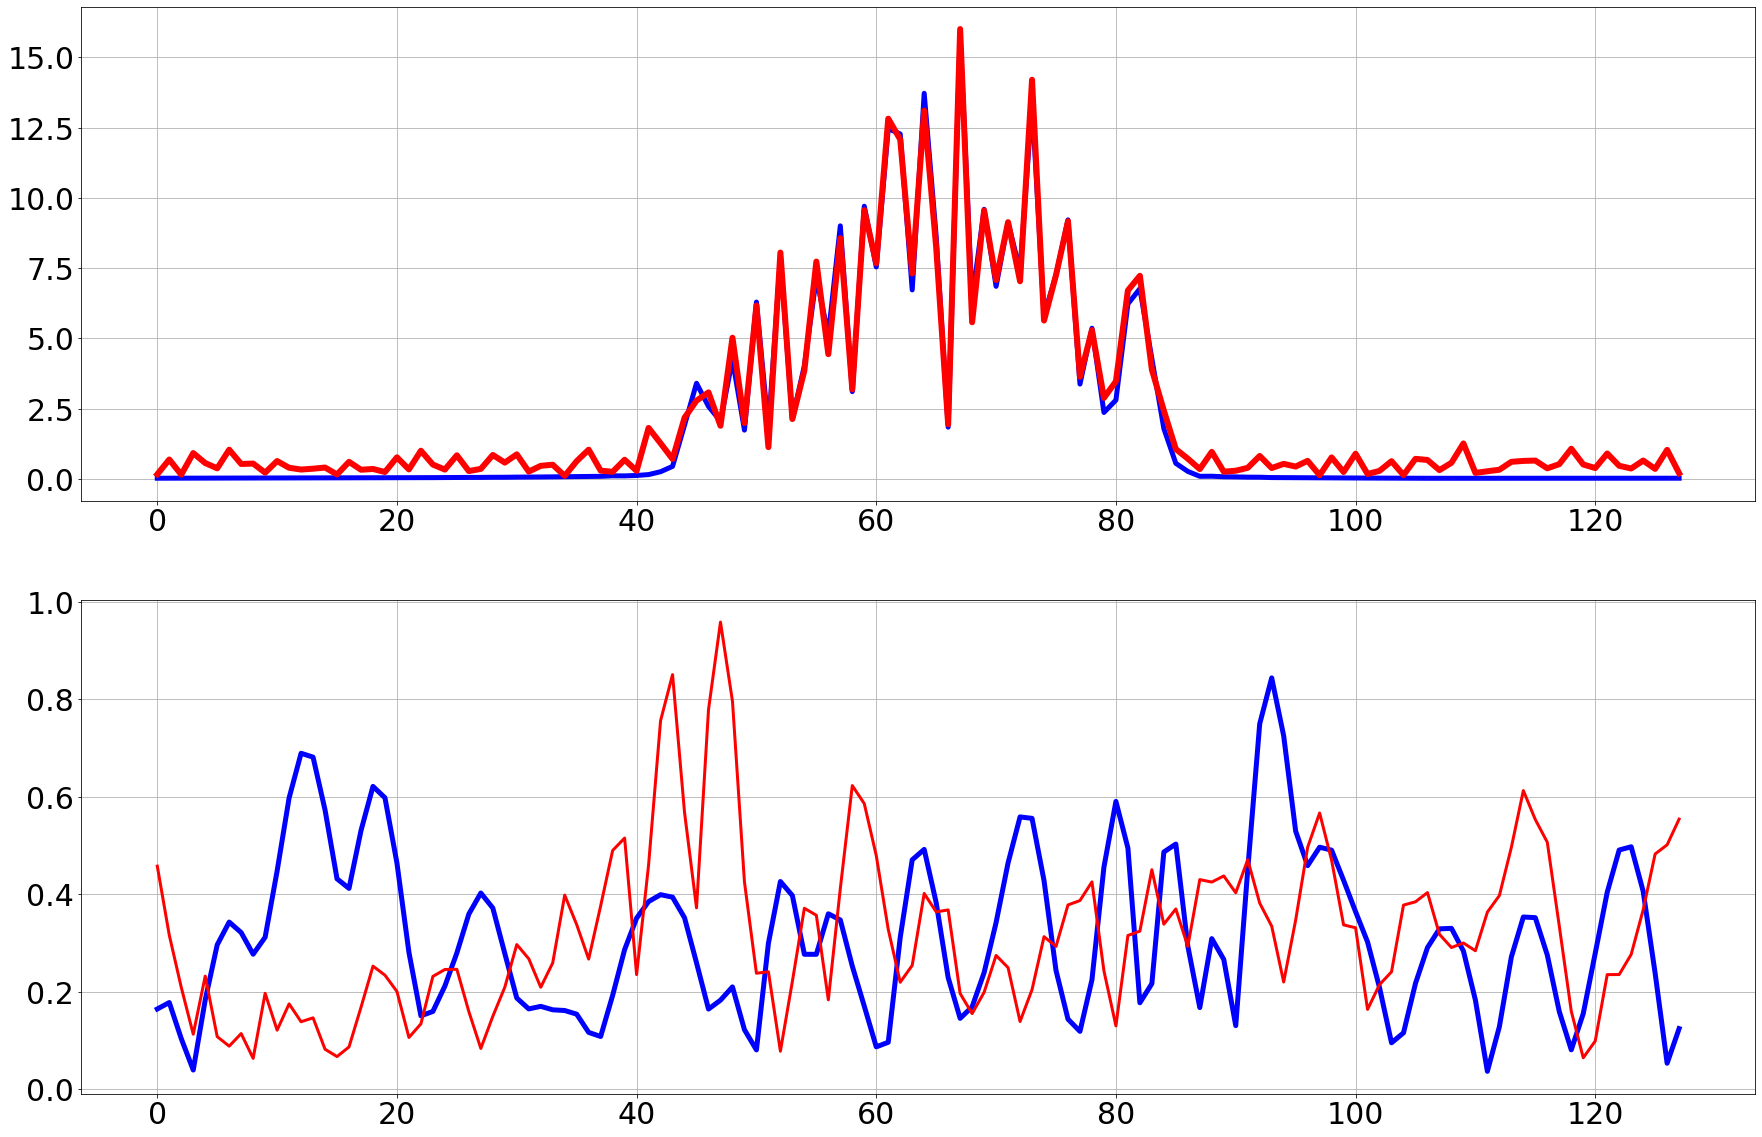

In [71]:
matplotlib.rcParams.update({'font.size': 30})

fig, axs = plt.subplots(2, 1, figsize=(30, 20))
# axs[0].plot(np.absolute(b_in_first_p0[0]), color='blue', linewidth=5.0)
# axs[0].plot(np.absolute(b_out_first_p0[0]), color='red', linewidth=3.0)
axs[0].plot(np.absolute(fftshift(fft(q_first_p0[0]))), color='blue', linewidth=5.0)
axs[0].plot(np.absolute(fftshift(fft(q_z_first_p0[0])   )), color='red', linewidth=6.0)
# axs[0].plot(np.absolute(a_re + 1j * a_im), color='green', linewidth=2.0)
# axs[0].set_xlim(0, 1)
# axs[0].set_xlabel('')
# axs[0].set_ylabel('')
axs[0].grid(True)

# axs[1].plot(np.absolute(b_in_second_p0[0]), color='blue', linewidth=5.0)
# axs[1].plot(np.absolute(b_out_second_p0[0]), color='red', linewidth=3.0)
axs[1].plot(np.absolute(q_second_p0[0]), color='blue', linewidth=5.0)
axs[1].plot(np.absolute(q_z_second_p0[0]), color='red', linewidth=3.0)
# axs[1].set_xlim(0, 1)
# axs[1].set_xlabel('')
# axs[1].set_ylabel('')
axs[1].grid(True)

print(1 / 0.0237)